In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

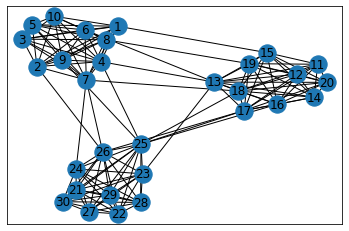

In [2]:
# modular graph
Nc=3
Nn=10
Nie=5
G=modular_graph(Nc, Nn, Nie, rando=True)
Gsc=SimplicialComplex(graph=G, no_faces=False)

community_assignment=np.concatenate((np.ones(Nn)*0,np.ones(Nn)*1,np.ones(Nn)*2),axis=0)

plt.figure()
nx.draw_networkx(G)
plt.show()

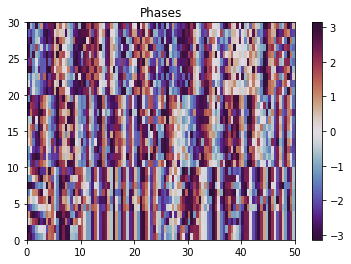

In [3]:
# normal node Kuramoto
np.random.seed(0)
initial_phase = np.random.uniform(0, 2 * np.pi, Gsc.n_nodes)
# initial_phase = np.concatenate((np.eye(len(graph.nodes -np.eye(len(graph.nodes))), axis=0).dot(initial_phase)

t_max = 50
n_t = 100
alpha_0=0
alpha_1=1.5 #np.ones(Gsc.n_edges)*np.pi

node_result = integrate_node_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_0=alpha_0,alpha_1=alpha_1)
plot_edge_kuramoto(node_result)

In [4]:
op=module_order_parameter(node_result.y,community_assignment)


<function matplotlib.pyplot.show(*args, **kw)>

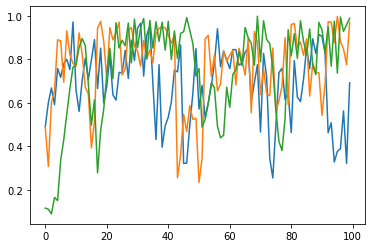

In [5]:
plt.figure()
plt.plot(op[0:3,:].T)
plt.show

In [6]:
print(Shanahan_indices(op))

(0.029409127081191373, 0.01657892865566027)


In [7]:
def pairwise_synchronisation(theta,community_assignment):
    from itertools import combinations
    
    
    
    comms = np.unique(community_assignment)
    Nn=theta.shape[0]
    Nt=theta.shape[1]
    Nc=len(np.unique(community_assignment))
    op=np.zeros((Nc,Nt))

    cnt = 0
    for c1,c2 in [comb for comb in combinations(comms, 2)]:
        ind1=np.argwhere(community_assignment==c1)
        ind2=np.argwhere(community_assignment==c2)                  
          
        op[cnt,:] = np.absolute(0.5*(np.exp(1j*theta[ind1,:]).sum(0) + np.exp(1j*theta[ind2,:]).sum(0)))  /(len(ind1)+len(ind2))
        cnt = cnt + 1     
    
    return op

op = pairwise_synchronisation(node_result.y,community_assignment)

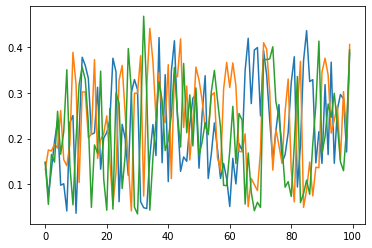

In [8]:
plt.plot(op.T)